In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import load_data as ld
import dataReferences as dr
import seaborn as sns

dir_data = ".\\data\\data_gouv_fr\\"

# Usagers
dic_usagers = ld.load_usagers(folder_path=dir_data, start_year=2020, end_year=2021)

# Caractéristiques
dic_caract = ld.load_caract(folder_path=dir_data, start_year=2020, end_year=2021)

df_usagers = dic_usagers[2020]
df_caract = dic_caract[2020]

## Merge data et suppression des colonnes inutiles

In [2]:
#  merge usagers and caracteristiques
df = df_usagers.merge(right=df_caract, on='Num_Acc', how='left')

# print(df_usagers.columns)
# print("\n")
# print(df_caract.columns)
# print("\n")
# print(df_u_c.columns)

# inutiles : ['id_vehicule', 'num_veh', 'adr'] 
df = df.drop(columns=['id_vehicule', 'num_veh', 'adr', 'lat', 'long'], axis=1)

## Encodages

In [3]:
# création de 4 classes basée sur les quartiles
# df['age'].describe()
def get_cl_age(age):
    if age <= 25:
        return '0-25'
    if 25 < age <= 37:
        return '26-37'
    if 37 < age <= 53:
        return '38-53'
    if 53 < age:
        return '>53'

df['luminosité'] = df['lum'].apply(lambda i: dr.get_labels('lum', i))
df['gravité'] = df['grav'].apply(lambda i: dr.get_labels('grav', i))
df['age'] = 2022 - df['an_nais']
df["classe d'age"] = [get_cl_age(age) for age in df['age']]
df["catégorie d'utilisateur"] = df['catu'].apply(lambda i: dr.get_labels('catu', i))
df["sexe_lbl"] = df['sexe'].apply(lambda i: dr.get_labels('sexe', i))

df = df.drop(columns=['an_nais', 'age'], axis=1)

columns_titles = ['Tué', 'Blessé hospitalisé', 'Blessé léger', 'Indemne']

## Relation Gravité - Age

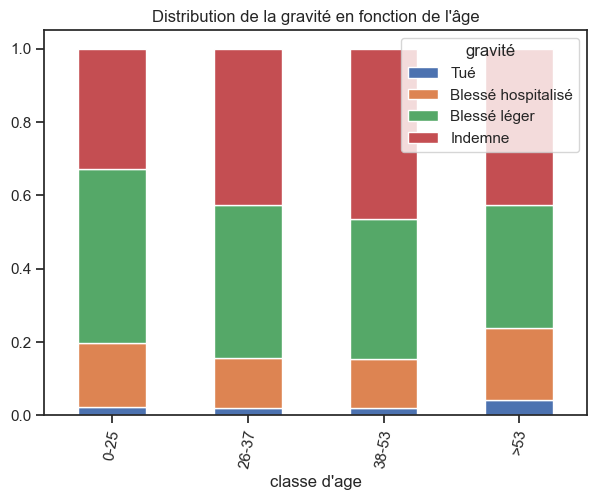

In [4]:
df_cross = pd.crosstab(df["classe d'age"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, title="Distribution de la gravité en fonction de l'âge")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")


## Relation Gravité - Luminosité

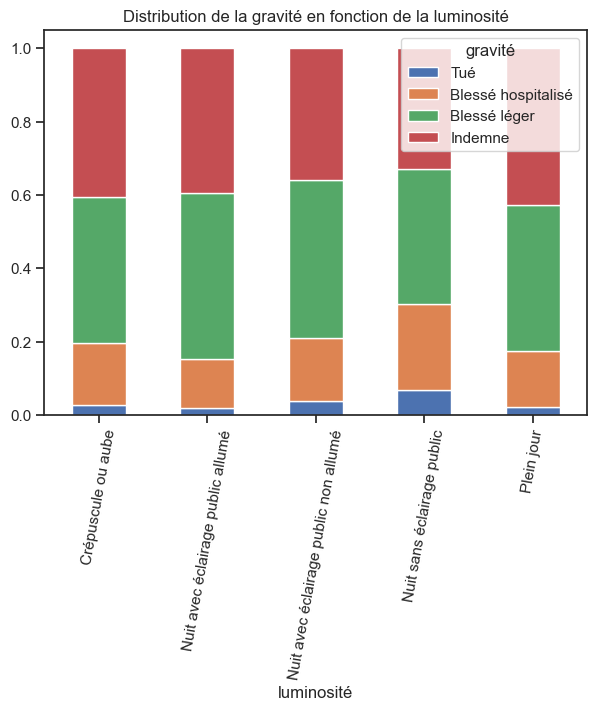

In [5]:
df_cross = pd.crosstab(df['luminosité'], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title='Distribution de la gravité en fonction de la luminosité')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")


## Relation Gravité - Place

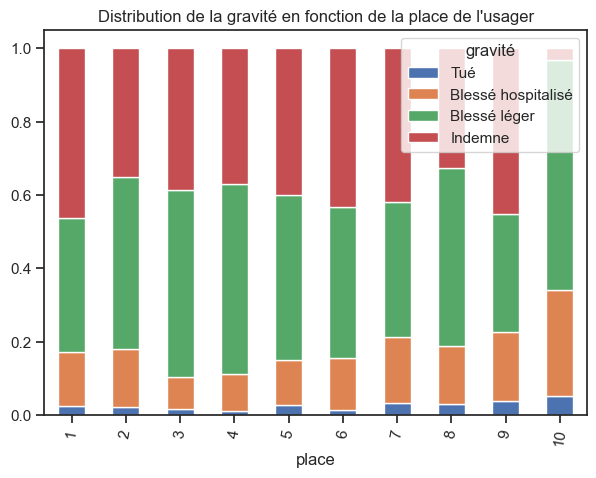

In [6]:
df_cross = pd.crosstab(df['place'], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la place de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation Gravité - Catégorie d'utilisateur

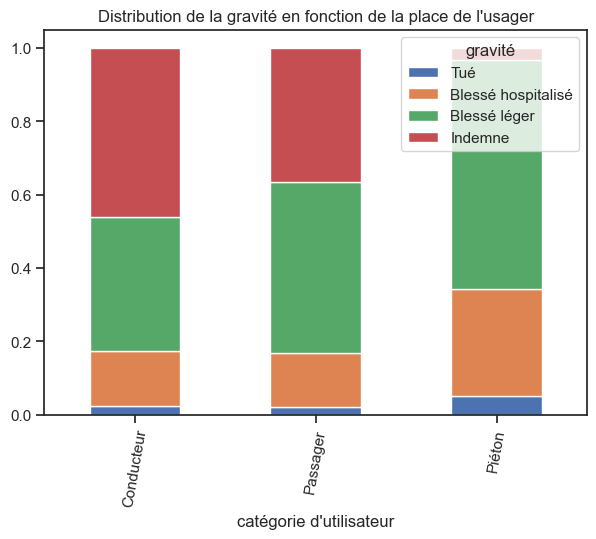

In [7]:
df_cross = pd.crosstab(df["catégorie d'utilisateur"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la place de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - sexe

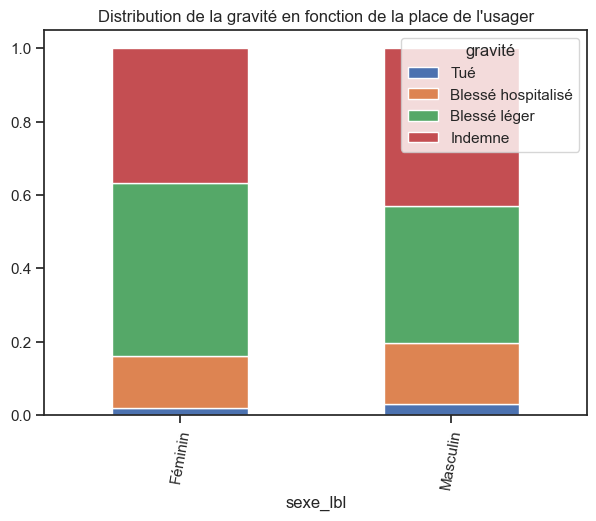

In [8]:
df_cross = pd.crosstab(df["sexe_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction du sexe de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

In [9]:
df.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu1', 'secu2',
       'secu3', 'locp', 'actp', 'etatp', 'jour', 'mois', 'an', 'hrmn', 'lum',
       'dep', 'com', 'agg', 'int', 'atm', 'col', 'luminosité', 'gravité',
       'classe d'age', 'catégorie d'utilisateur', 'sexe_lbl'],
      dtype='object')